In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import zipfile
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils import to_categorical
from keras.models import Sequential,load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint,EarlyStopping
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import random
import pickle
import os
import sys

In [ ]:
local_zip = '/content/drive/MyDrive/data_folder.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/data_folder')
zip_ref.close()

base_dir = '/content/data_folder'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0,width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen=ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 64, class_mode = 'binary', target_size = (200, 200))
validation_generator = validation_datagen.flow_from_directory(validation_dir,  batch_size = 64, class_mode = 'binary', target_size = (200, 200), shuffle = False)
test_generator=test_datagen.flow_from_directory(test_dir,  batch_size = 64, class_mode = 'binary', target_size = (200, 200), shuffle = False)

Found 20000 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [ ]:
def define_model():
 model = Sequential()
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
 model.add(MaxPooling2D((2, 2)))
 model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Flatten())
 model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dense(1, activation='sigmoid'))
 opt = SGD(learning_rate=0.01, momentum=0.9)
 model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
 return model

In [ ]:
model=define_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 50, 50, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 25, 25, 128)       0

In [ ]:
es=EarlyStopping(monitor='val_accuracy',patience=8,start_from_epoch=30,restore_best_weights=True)
cp = ModelCheckpoint('/content/drive/MyDrive/best_cnn_model_50epoch.h5', monitor='val_accuracy', save_best_only=True, mode='max',verbose=0)

In [ ]:
cnn_his=model.fit(train_generator,epochs=50, steps_per_epoch=len(train_generator),validation_data=validation_generator, validation_steps=len(validation_generator),callbacks=[cp,es])

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 0.6703 - accuracy: 0.6040

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 258s 798ms/step - loss: 0.6703 - accuracy: 0.6040 - val_loss: 0.6031 - val_accuracy: 0.6704
Epoch 2/50
313/313 [==============================] - 248s 792ms/step - loss: 0.5750 - accuracy: 0.6959 - val_loss: 0.5311 - val_accuracy: 0.7348
Epoch 3/50
313/313 [==============================] - 242s 774ms/step - loss: 0.5316 - accuracy: 0.7308 - val_loss: 0.4988 - val_accuracy: 0.7540
Epoch 4/50
313/313 [==============================] - 239s 764ms/step - loss: 0.4936 - accuracy: 0.7591 - val_loss: 0.4621 - val_accuracy: 0.7766
Epoch 5/50
313/313 [==============================] - 240s 767ms/step - loss: 0.4572 - accuracy: 0.7838 - val_loss: 0.4020 - val_accuracy: 0.8138
Epoch 6/50
313/313 [==============================] - 242s 772ms/step - loss: 0.4385 - accuracy: 0.7962 - val_loss: 0.4540 - val_accuracy: 0.7912
Epoch 7/50
313/313 [==============================] - 238s 761ms/step - loss: 0.4197 - accuracy: 0.8051 - val_loss: 0.3917 - val_accura

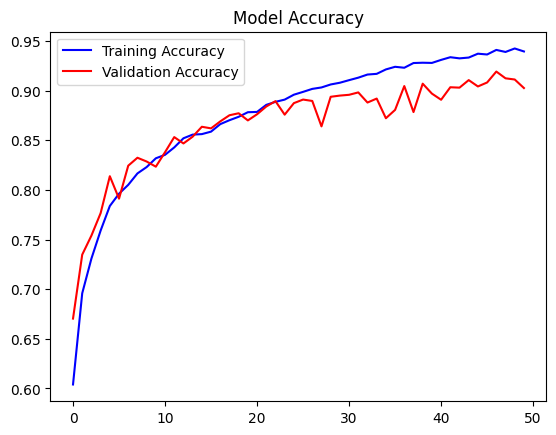

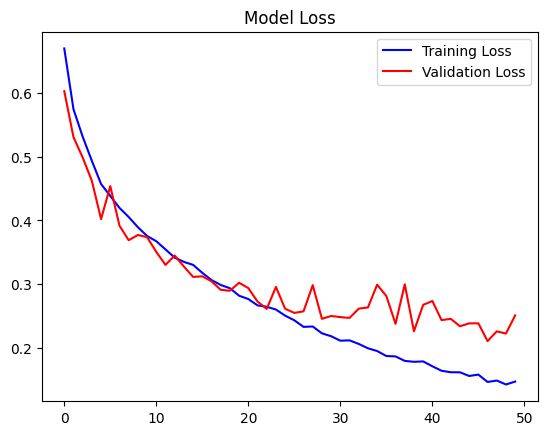

In [ ]:
acc=cnn_his.history['accuracy']
val_acc=cnn_his.history['val_accuracy']
epochs=range(len(acc))
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.figure()

loss=cnn_his.history['loss']
val_loss=cnn_his.history['val_loss']
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()


In [ ]:
saved_model = load_model('/content/drive/MyDrive/best_cnn_model_50epoch.h5')

In [ ]:
saved_model = load_model('/content/drive/MyDrive/best_cnn_model_50epoch.h5')
saved_model.evaluate(validation_generator)
saved_model.evaluate(train_generator)

313/313 [==============================] - 881s 3s/step - loss: 0.1244 - accuracy: 0.9514


[0.12438072264194489, 0.951449990272522]

40/40 [==============================] - 9s 141ms/step


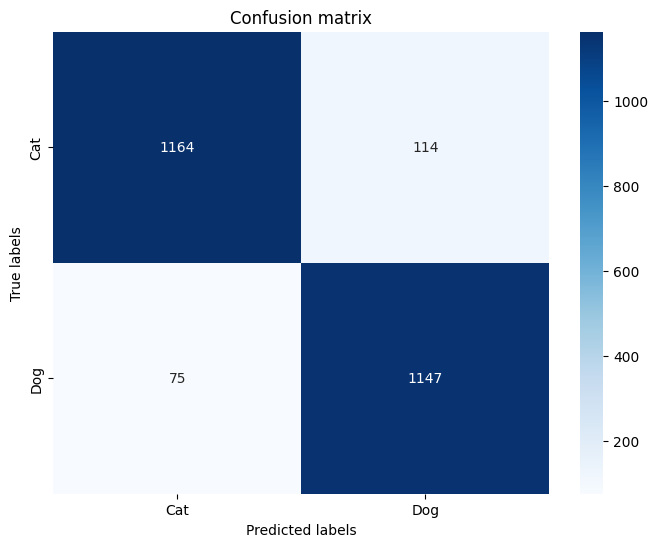

In [ ]:
predictions = saved_model.predict(test_generator).flatten()
y_pred = (predictions > 0.5).astype(int)

cm = confusion_matrix(test_generator.classes, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()


In [ ]:
predictions = saved_model.predict(test_generator).flatten()
y_pred = (predictions > 0.5).astype(int)

print('Classification report CNN model:')
print(classification_report(test_generator.classes, y_pred, target_names=['Cat', 'Dog']))


40/40 [==============================] - 9s 224ms/step
Classification report CNN model:
              precision    recall  f1-score   support

         Cat       0.94      0.91      0.92      1278
         Dog       0.91      0.94      0.92      1222

    accuracy                           0.92      2500
   macro avg       0.92      0.92      0.92      2500
weighted avg       0.92      0.92      0.92      2500

